<a href="https://colab.research.google.com/github/msinankhan/Data-Extraction-and-Text-Analysis/blob/main/Ethereum_Price_Prediction_TIMESERIES_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data_dir = 'drive/MyDrive/data/ETH-USD.csv'

In [5]:
import pandas as pd
df = pd.read_csv(data_dir, 
                 parse_dates=["Date"], 
                 index_col=["Date"]) # parse the date column (tells pandas column 1 is a datetime)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1753 entries, 2017-11-09 to 2022-08-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1753 non-null   float64
 1   High       1753 non-null   float64
 2   Low        1753 non-null   float64
 3   Close      1753 non-null   float64
 4   Adj Close  1753 non-null   float64
 5   Volume     1753 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 95.9 KB


In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [8]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-23,1622.939331,1666.676514,1569.428589,1662.769897,1662.769897,18322041914
2022-08-24,1662.695435,1686.557739,1610.099243,1657.059204,1657.059204,16780932907
2022-08-25,1657.336548,1718.183228,1656.856079,1696.457031,1696.457031,14818795695
2022-08-26,1696.324585,1698.561035,1498.771240,1507.782837,1507.782837,26713710143
2022-08-27,1508.156982,1517.150024,1454.282959,1491.395020,1491.395020,18120831899


In [9]:
len(df)

1753

Lets only consider the closing price for each day.

In [10]:
ethereum_prices = pd.DataFrame(df["Close"]).rename(columns={"Close": "Price"})
ethereum_prices.head()

,Price
Date,
2017-11-09,320.884003
2017-11-10,299.252991
2017-11-11,314.681000
2017-11-12,307.907990
2017-11-13,316.716003


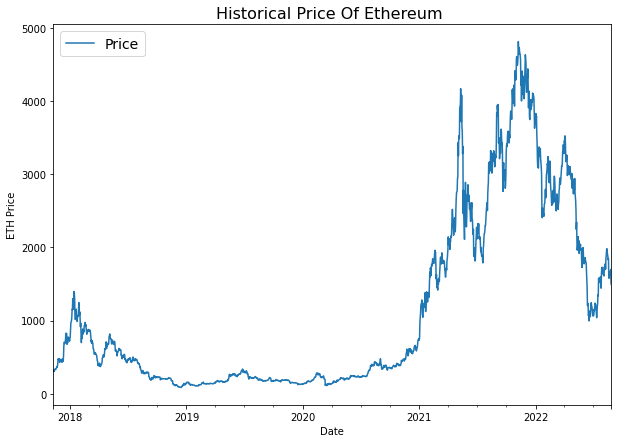

In [11]:
import matplotlib.pyplot as plt
ethereum_prices.plot(figsize=(10, 7))
plt.ylabel("ETH Price")
plt.title("Historical Price Of Ethereum ", fontsize=16)
plt.legend(fontsize=14);

Using the scikit learn's train_test_split() function would give us a split which is random in which data from the psuedo future may be included in the train dataset.

Hence we'd use indexing to make the train-test split.

In [13]:
timesteps = ethereum_prices.index.to_numpy()
prices = ethereum_prices["Price"].to_numpy()

In [14]:
timesteps[:10] , prices[:10]

(array(['2017-11-09T00:00:00.000000000', '2017-11-10T00:00:00.000000000',
        '2017-11-11T00:00:00.000000000', '2017-11-12T00:00:00.000000000',
        '2017-11-13T00:00:00.000000000', '2017-11-14T00:00:00.000000000',
        '2017-11-15T00:00:00.000000000', '2017-11-16T00:00:00.000000000',
        '2017-11-17T00:00:00.000000000', '2017-11-18T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([320.884003, 299.252991, 314.681   , 307.90799 , 316.716003,
        337.631012, 333.356995, 330.924011, 332.394012, 347.612   ]))

In [15]:
split_size=int(0.8 * len(prices))

X_train,y_train=timesteps[:split_size],prices[:split_size]

X_test,y_test=timesteps[split_size:],prices[split_size:]

In [16]:
len(X_train), len(X_test)

(1402, 351)

In [17]:
y_train

array([ 320.884003,  299.252991,  314.681   , ..., 3497.315186,
       3427.340088, 3211.505859])

Visviualising the train and test set:

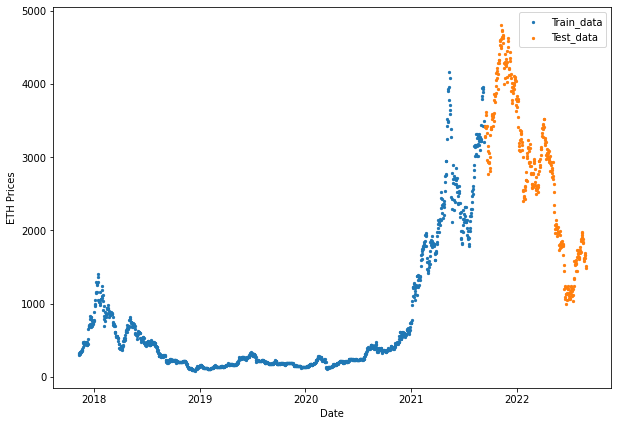

In [18]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train_data")
plt.scatter(X_test,y_test,s=5,label="Test_data")
plt.xlabel("Date")
plt.ylabel("ETH Prices")
plt.legend()
plt.show()

**Horizon** = number of timesteps to predict into future

**Window** = number of timesteps from past used to predict horizon

Let's create a basline model, we'd build a **Naive model** for this,
It is a fairly simple model, with the model using the previous timestep value to predict the next timestep value.

It looks like this:

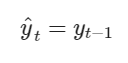




## **Naïve forecast (baseline)**

In [19]:
naive_forecast = y_test[:-1]

In [20]:
naive_forecast[:10], naive_forecast[-10:]

(array([3270.278076, 3410.134521, 3285.511719, 3429.169678, 3615.282715,
        3571.294922, 3398.538818, 3432.018311, 3329.447998, 2958.993408]),
 array([1832.999634, 1847.007813, 1612.987305, 1577.003784, 1619.31897 ,
        1622.505859, 1662.769897, 1657.059204, 1696.457031, 1507.782837]))

In [21]:
y_test[:10]

array([3270.278076, 3410.134521, 3285.511719, 3429.169678, 3615.282715,
       3571.294922, 3398.538818, 3432.018311, 3329.447998, 2958.993408])

In [22]:
def plot_time_series(timesteps,values,start=0,end=None,label=None,format='.'):
  plt.plot(timesteps[start:end],values[start:end],format,label=label)
  plt.xlabel("Time")
  plt.ylabel("ETH price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

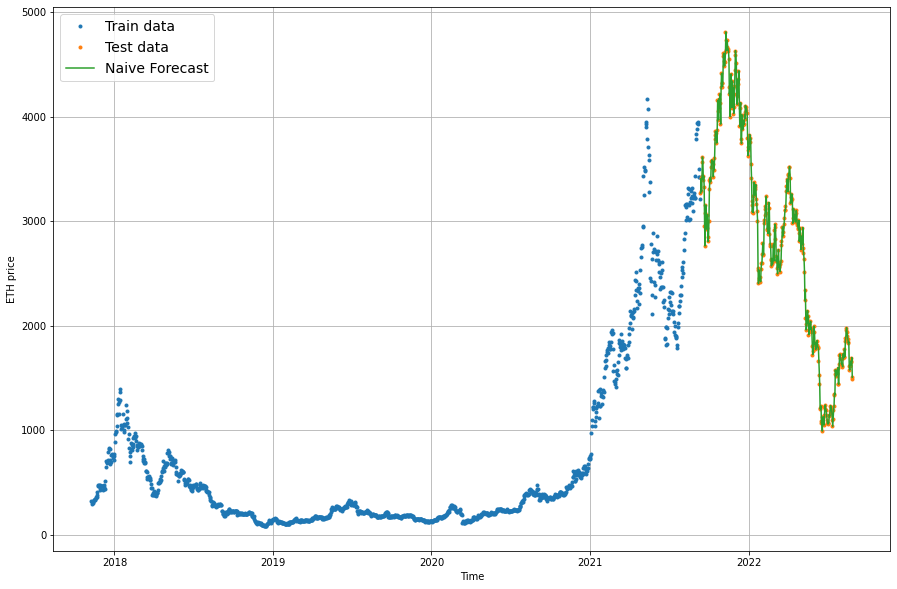

In [23]:
#Plotting the Naive forecast:

plt.figure(figsize=(15,10))
plot_time_series(timesteps=X_train,values=y_train,label="Train data")
plot_time_series(timesteps=X_test,values=y_test,label="Test data")
plot_time_series(timesteps=X_test[1:],values=naive_forecast,format='-',label='Naive Forecast')

In [24]:
def evaluate_preds(y_true, y_pred):
  
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)
 
  
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) 
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy()
          }

In [25]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 91.56533, 'mse': 14612.331, 'rmse': 120.88148, 'mape': 3.427295}

### **DENSE MODEL**

The following model is a simple Dense mode, model_Dense will have:

*   A single dense layer with 128 hidden units and ReLU (rectified linear unit) activation
*   An output layer with linear activation
*   Adam optimizer and MAE loss function
*   Batch size of 128
*   100 epochs







##### horizon = number of timesteps to predict into future
##### window = number of timesteps from past used to predict horizon

In [27]:
HORIZON = 1
WINDOW_SIZE = 7 


The following function takes in an array and turn it into a window and horizon

In [28]:
def get_labelled_windows(x, horizon=1):
  return x[:, :-horizon], x[:, -horizon:]

The following function turns a 1D array into a 2D array of sequential windows of window_size.

In [29]:
def make_windows(x, window_size=7, horizon=1):
  
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T 
 
  windowed_array = x[window_indexes]

  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [30]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [31]:
len(full_windows),len(full_labels)

(1746, 1746)

In [63]:
def make_train_test_splits(windows,labels,test_split=0.2):
  split_size=int(len(windows)*(1-test_split))
  train_windows=windows[:split_size]
  train_labels=labels[:split_size]
  test_windows=windows[split_size:]
  test_labels=labels[split_size:]

  return train_windows,test_windows,train_labels,test_labels


In [67]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1396, 350, 1396, 350)

In [68]:
from tensorflow.keras.layers import Dense


In [69]:
tf.random.set_seed(42)

model_Dense=tf.keras.Sequential([
    Dense(128,activation='relu'),
    Dense(HORIZON)  
])

model_Dense.compile(loss='mae',
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['mae']
                    )

model_Dense.fit(x=train_windows,
                y=train_labels,
                epochs=100,
                verbose=1,
                batch_size=128,
                validation_data=(test_windows,test_labels),
                )

Epoch 1/100
11/11 [==============================] - 0s 16ms/step - loss: 226.9808 - mae: 226.9808 - val_loss: 170.8192 - val_mae: 170.8192
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 83.5597 - mae: 83.5597 - val_loss: 251.3779 - val_mae: 251.3779
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 60.3860 - mae: 60.3860 - val_loss: 170.7533 - val_mae: 170.7533
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 53.7358 - mae: 53.7358 - val_loss: 189.3169 - val_mae: 189.3169
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 48.9401 - mae: 48.9401 - val_loss: 141.2111 - val_mae: 141.2111
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 47.3962 - mae: 47.3962 - val_loss: 139.1361 - val_mae: 139.1361
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 45.6305 - mae: 45.6305 - val_loss: 156.5131 - val_mae: 156.5131
Epoch 8/100
11/11 [===================

In [70]:
model_Dense.evaluate(test_windows,test_labels)

11/11 [==============================] - 0s 2ms/step - loss: 100.4251 - mae: 100.4251


[100.42508697509766, 100.42508697509766]

In [71]:
# Making Predictions:
Dense_preds=tf.squeeze(model_Dense.predict(test_windows))

In [75]:
model_Dense_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                                  y_pred=Dense_preds)

In [76]:
model_Dense_results

{'mae': 100.42509, 'mse': 17547.717, 'rmse': 132.46779, 'mape': 3.8007066}

In [78]:
#Comparing with Naive results:
naive_results

{'mae': 91.56533, 'mse': 14612.331, 'rmse': 120.88148, 'mape': 3.427295}

## **LSTM MODEL (RNN)**

The ```tf.keras.layers.LSTM()``` layer takes a tensor with [batch, timesteps, feature] dimensions.

To fix this, we could adjust the shape of all of our ```train_windows```  or we could use a ```tf.keras.layers.Lamdba``` (called a Lambda layer) to do this for us in our model.

The Lambda layer wraps a function into a layer which can be used with a model.

In [80]:
from tensorflow.keras import layers

In [83]:
tf.random.set_seed(42)

inputs=layers.Input(shape=(WINDOW_SIZE))

x=layers.Lambda(lambda x: tf.expand_dims(x,axis=1))(inputs)

x=layers.LSTM(128,activation='relu')(x)

output=layers.Dense(HORIZON)(x)

LSTM_model= tf.keras.Model(inputs=inputs, outputs=output)

LSTM_model.compile(loss='mae',
                   optimizer=tf.keras.optimizers.Adam()
                   )

LSTM_model.fit(train_windows,
               train_labels,
               epochs=119,
               batch_size=128,
               validation_data=(test_windows,test_labels))

Epoch 1/119
11/11 [==============================] - 2s 29ms/step - loss: 561.1096 - val_loss: 1896.1434
Epoch 2/119
11/11 [==============================] - 0s 9ms/step - loss: 341.8191 - val_loss: 730.9246
Epoch 3/119
11/11 [==============================] - 0s 10ms/step - loss: 93.8249 - val_loss: 324.8532
Epoch 4/119
11/11 [==============================] - 0s 10ms/step - loss: 62.4862 - val_loss: 142.3543
Epoch 5/119
11/11 [==============================] - 0s 7ms/step - loss: 49.3516 - val_loss: 133.7403
Epoch 6/119
11/11 [==============================] - 0s 8ms/step - loss: 45.2876 - val_loss: 131.9626
Epoch 7/119
11/11 [==============================] - 0s 10ms/step - loss: 43.6790 - val_loss: 138.2379
Epoch 8/119
11/11 [==============================] - 0s 8ms/step - loss: 41.5800 - val_loss: 159.9731
Epoch 9/119
11/11 [==============================] - 0s 10ms/step - loss: 41.7898 - val_loss: 115.3306
Epoch 10/119
11/11 [==============================] - 0s 9ms/step - loss: 

In [84]:
LSTM_model.evaluate(test_windows,test_labels)

11/11 [==============================] - 0s 2ms/step - loss: 100.3544


100.35440063476562

In [85]:
LSTM_model_preds=LSTM_model.predict(test_windows)

In [87]:
LSTM_model_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                                  y_pred=tf.squeeze(LSTM_model_preds))

In [88]:
LSTM_model_results

{'mae': 100.35441, 'mse': 17907.02, 'rmse': 133.81711, 'mape': 3.774754}

### COMPARE THE TWO MODELS WITH THE BASELINE(NAIVE MODEL)

In [89]:
model_results = pd.DataFrame({"naive_model": naive_results,
                              "Dense_model": model_Dense_results,
                              "LSTM_model":LSTM_model_results}).T
model_results.head()

,mae,mse,rmse,mape
naive_model,91.565331,14612.331055,120.881477,3.427295
Dense_model,100.425087,17547.716797,132.467789,3.800707
LSTM_model,100.354408,17907.019531,133.817108,3.774754


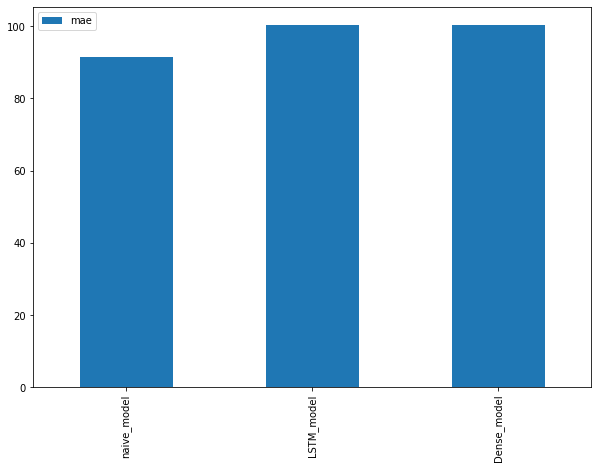

In [90]:
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")